# Importing Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import re
import altair as alt
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Data Pre-Processing

In [2]:
#Loading the dataset
df = pd.read_csv("Cheapestelectriccars-EVDatabase.csv")
df = df.replace(r'^\s*$', np.nan, regex=True)
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 177


,Name,Subtitle,Acceleration_in_sec,TopSpeed_in_km/hr,Range_in_km,Efficiency_in_Wh/km,FastChargeSpeed_kmper_hr,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",34392
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,205,Front Wheel Drive,5,NaN,"31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","138,830"


In [3]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name                      177 non-null    object
 1   Subtitle                  177 non-null    object
 2   Acceleration_in_sec       177 non-null    object
 3   TopSpeed_in_km/hr         177 non-null    object
 4   Range_in_km               177 non-null    object
 5   Efficiency_in_Wh/km       177 non-null    object
 6   FastChargeSpeed_kmper_hr  177 non-null    object
 7   Drive                     177 non-null    object
 8   NumberofSeats             177 non-null    int64 
 9   PriceinGermany            165 non-null    object
 10  PriceinUK                 174 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.3+ KB


In [4]:
df.head()

,Name,Subtitle,Acceleration_in_sec,TopSpeed_in_km/hr,Range_in_km,Efficiency_in_Wh/km,FastChargeSpeed_kmper_hr,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",34392
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,205,Front Wheel Drive,5,NaN,"31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","138,830"


In [5]:
df['FastChargeSpeed_kmper_hr']= df['FastChargeSpeed_kmper_hr'].str.replace('km/hr','')

In [6]:
df['PriceinGermany']= df['PriceinGermany'].str.replace('€','')

In [7]:
df['PriceinUK']= df['PriceinUK'].str.replace('£','')

In [8]:
df=df.drop(['Name','Subtitle'],axis='columns')

In [9]:
df['FastChargeSpeed_kmper_hr']= df['FastChargeSpeed_kmper_hr'].str.replace('km/h','')

In [10]:
df['Efficiency_in_Wh/km']= df['Efficiency_in_Wh/km'].str.replace('Wh/km','')

In [11]:
df['Range_in_km']= df['Range_in_km'].str.replace('km','')

In [12]:
df['TopSpeed_in_km/hr']= df['TopSpeed_in_km/hr'].str.replace('km/h','')

In [13]:
df['Acceleration_in_sec']= df['Acceleration_in_sec'].str.replace('sec','')

In [14]:
df.head()

,Acceleration_in_sec,TopSpeed_in_km/hr,Range_in_km,Efficiency_in_Wh/km,FastChargeSpeed_kmper_hr,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,7.3,150,335,173,210,Front Wheel Drive,5,"42,990",34392
1,22.4,130,160,194,205,Front Wheel Drive,5,NaN,"31,680"
2,7.9,144,220,164,230,Front Wheel Drive,5,"29,990","25,995"
3,5.7,200,375,231,600,All Wheel Drive,5,NaN,"79,900"
4,2.8,260,390,215,860,All Wheel Drive,4,"186,336","138,830"


In [15]:
for item in df:
    print(item)

Acceleration_in_sec
TopSpeed_in_km/hr
Range_in_km
Efficiency_in_Wh/km
FastChargeSpeed_kmper_hr
Drive
NumberofSeats
PriceinGermany
PriceinUK


In [16]:
df.isnull().sum()

Acceleration_in_sec          0
TopSpeed_in_km/hr            0
Range_in_km                  0
Efficiency_in_Wh/km          0
FastChargeSpeed_kmper_hr     0
Drive                        0
NumberofSeats                0
PriceinGermany              12
PriceinUK                    3
dtype: int64

In [17]:
pd.options.mode.chained_assignment = None

In [18]:
df["PriceinGermany"] = [float(str(i).replace(",", "")) for i in df["PriceinGermany"]]

In [19]:
df["Acceleration_in_sec"] = [float(str(i).replace(",", "")) for i in df["Acceleration_in_sec"]]
df["Range_in_km"] = [float(str(i).replace(",", "")) for i in df["Range_in_km"]]
df["Efficiency_in_Wh/km"] = [float(str(i).replace(",", "")) for i in df["Efficiency_in_Wh/km"]]
df["NumberofSeats"] = [float(str(i).replace(",", "")) for i in df["NumberofSeats"]]
df["TopSpeed_in_km/hr"] = [float(str(i).replace(",", "")) for i in df["TopSpeed_in_km/hr"]]
df["NumberofSeats"] = [float(str(i).replace(",", "")) for i in df["NumberofSeats"]]
df["PriceinUK"] = [float(str(i).replace(",", "")) for i in df["PriceinUK"]]
df["FastChargeSpeed_kmper_hr"] = [float(str(i).replace(",", "")) for i in df["FastChargeSpeed_kmper_hr"]]

In [20]:
(df['PriceinGermany'].median())

50880.0

In [21]:
df=df.fillna(50647.5*0.8)

In [22]:
df.isnull().sum()

Acceleration_in_sec         0
TopSpeed_in_km/hr           0
Range_in_km                 0
Efficiency_in_Wh/km         0
FastChargeSpeed_kmper_hr    0
Drive                       0
NumberofSeats               0
PriceinGermany              0
PriceinUK                   0
dtype: int64

In [23]:
for i in range(0, len(df["PriceinUK"])):
    if (df["PriceinUK"][i]==0):
        val=df["PriceinGermany"][i]*(0.85)
        df["PriceinUK"][i]=val

In [24]:
df1=df.drop(['PriceinGermany'],axis='columns')

In [25]:
df1.head()

,Acceleration_in_sec,TopSpeed_in_km/hr,Range_in_km,Efficiency_in_Wh/km,FastChargeSpeed_kmper_hr,Drive,NumberofSeats,PriceinUK
0,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5.0,34392.0
1,22.4,130.0,160.0,194.0,205.0,Front Wheel Drive,5.0,31680.0
2,7.9,144.0,220.0,164.0,230.0,Front Wheel Drive,5.0,25995.0
3,5.7,200.0,375.0,231.0,600.0,All Wheel Drive,5.0,79900.0
4,2.8,260.0,390.0,215.0,860.0,All Wheel Drive,4.0,138830.0


# Data Visualization

In [26]:
def altair_dist(df, colname):
    name = ' '.join(re.findall('[A-Z][^A-Z]*', colname))
    hist = alt.Chart(df).mark_bar().encode(
        x=alt.X(
            shorthand=colname, 
            bin=alt.Bin(maxbins=20), 
            title=f"{name} (binned)"
        ),
        y=alt.Y(
            shorthand='count()', 
            title='Number of Electric Cars'
        )
    ).properties(title=f'Histogram of {name}',width=200,
    height=200)
    box = alt.Chart(df).mark_boxplot().encode(
        x=alt.X(
            shorthand=colname,
            title=name
        ),
    ).properties(title=f'Boxplot of {name}')

    return hist & box

In [27]:
features = ['Acceleration_in_sec', 'Range_in_km', 'Efficiency_in_Wh/km', 
           'FastChargeSpeed_kmper_hr','NumberofSeats', 'PriceinUK']

(altair_dist(df1, features[0]) | altair_dist(df1, features[1])) &\
(altair_dist(df1, features[2]) | altair_dist(df1, features[3])) &\
(altair_dist(df1, features[4]) | altair_dist(df1, features[5])) 

alt.VConcatChart(...)

In [28]:
brush = alt.selection(type='interval', resolve='global')

# common base for all subplots
base = alt.Chart(df).mark_point().encode(
    y=alt.Y('PriceinUK', title='Price'),
    color=alt.condition(
        brush, 
        'Drive', 
        alt.ColorValue('black'), 
        legend=alt.Legend(orient="top"), 
        scale=alt.Scale(scheme='set1'),
    )
).add_selection(
    brush
).properties(
    width=300,
    height=200
)

x1 = alt.X('Acceleration_in_sec', title='Acceleration_in_sec')
x2 = alt.X('TopSpeed_in_km/hr', title='TopSpeed_in_km/hr')
x3 = alt.X('Range_in_km', title='Range_in_km')
x4 = alt.X('Efficiency_in_Wh/km', title='Efficiency_in_Wh/km')
x5 = alt.X('FastChargeSpeed_kmper_hr', title='FastChargeSpeed_kmper_hr')

# layout for subplots
(base.encode(x=x1) | base.encode(x=x2)) &\
(base.encode(x=x3) | base.encode(x=x4)) &\
(base.encode(x=x5))

alt.VConcatChart(...)

In [29]:
base = alt.Chart(df).mark_boxplot().encode(
    y=alt.Y('PriceinUK', title='Price'), 
    color=alt.Color(
        shorthand='Drive', 
        scale=alt.Scale(scheme='set1'),
        legend=alt.Legend(orient="top"),
    )
).properties(
    width=200, 
    height=200
)

x1 = alt.X('NumberofSeats') 
x2 = alt.X('Drive')
title1 = 'Distribution of Price across Number of Seats and Drive Type'
title2 = 'Distribution of Price across Drive Type'

base.encode(x=x1).properties(title=title1) | base.encode(x=x2).properties(title=title2)

alt.HConcatChart(...)

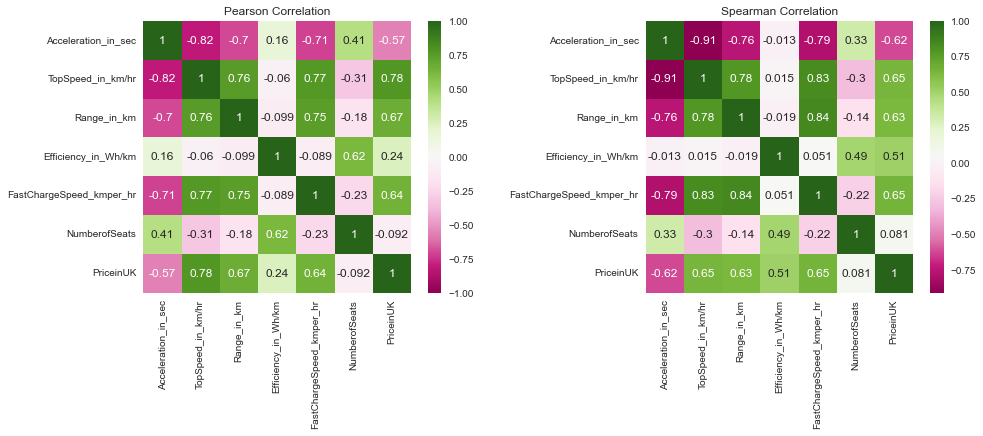

In [30]:
#correlation matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)

sns.heatmap(
    data=df1.corr(method='pearson'), 
    vmin=-1, vmax=1, 
    annot=True, cmap='PiYG', 
    ax=ax[0]
)
sns.heatmap(
    data=df1.corr(method='spearman'), 
     
    annot=True, cmap='PiYG', 
    ax=ax[1]
)

ax[0].set_title('Pearson Correlation')
ax[1].set_title('Spearman Correlation')
plt.show()

# Label Encoding and Normalization

In [31]:
df['Drive']= df['Drive'].str.replace('Front Wheel Drive','1')
df['Drive']= df['Drive'].str.replace('Rear Wheel Drive','2')
df['Drive']= df['Drive'].str.replace('All Wheel Drive','3')
df["Drive"] = [float(str(i).replace(",", "")) for i in df["Drive"]]

In [32]:
#Get list of categorical variables
s = (df1.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Drive']


In [33]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df1[i]=df1[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [34]:
#Creating a copy of data
ds = df1.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Acceleration_in_sec',
'TopSpeed_in_km/hr',
'Range_in_km',
'Efficiency_in_Wh/km',
'FastChargeSpeed_kmper_hr',
'Drive',
'NumberofSeats',
'PriceinUK']
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [35]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Acceleration_in_sec,TopSpeed_in_km/hr,Range_in_km,Efficiency_in_Wh/km,FastChargeSpeed_kmper_hr,Drive,NumberofSeats,PriceinUK
0,-0.153916,-0.648956,-0.056189,-0.660651,-1.105710,0.162727,-0.229174,-0.606926
1,4.657455,-1.126368,-1.576243,-0.019324,-1.126330,0.162727,-0.229174,-0.708997
2,0.037264,-0.792180,-1.055082,-0.935506,-1.023227,0.162727,-0.229174,-0.922962
3,-0.663731,0.544573,0.291252,1.110632,0.502701,-1.146482,-0.229174,1.105846
4,-1.587769,1.976808,0.421542,0.622002,1.574975,-1.146482,-1.325490,3.323779


# PCA

In [36]:
#code for getting explained_variance_ratio
dim=[]
var=[]
for i in range(1,8):
    pca = PCA(n_components=i)
    pca.fit(scaled_ds)
    var.append(pca.explained_variance_ratio_)
    dim.append(i)
var_new=var[6]

In [37]:
var_new

array([0.52555874, 0.22202752, 0.09333776, 0.05323798, 0.03908308,
       0.03040064, 0.02366377])

Text(0, 0.5, 'cumulative explained variance')

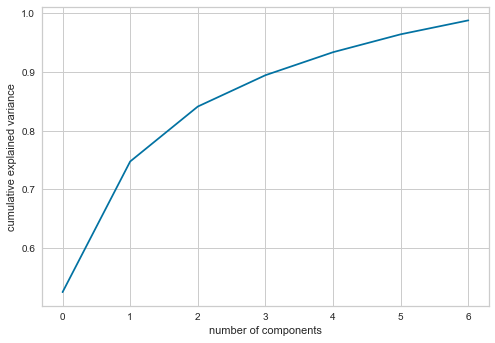

In [38]:
# b. Plotting explained_variance_ratio with dimension
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [39]:
#Initiating PCA to reduce dimentions aka features to 5
pca = PCA(n_components=5)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3",'col4','col5']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,177.0,4.108452e-17,2.056297,-3.938034,-1.535546,-0.393892,1.199464,8.960003
col2,177.0,-2.132632e-17,1.336530,-2.142842,-0.951544,-0.322307,0.784291,3.266595
col3,177.0,4.767059e-17,0.866571,-1.273151,-0.692587,-0.223776,0.636520,2.799800
col4,177.0,-4.453437e-17,0.654464,-2.031780,-0.339524,-0.026601,0.381048,2.200099
col5,177.0,4.288785e-17,0.560751,-1.409651,-0.304197,-0.037360,0.163343,3.680138


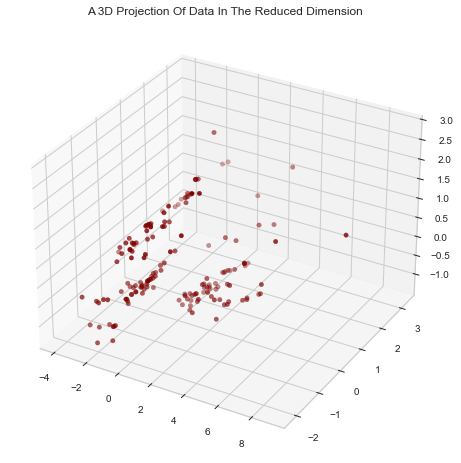

In [40]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering 

### Elbow method to find Optimal no. of Clusters

Elbow Method to determine the number of clusters to be formed:


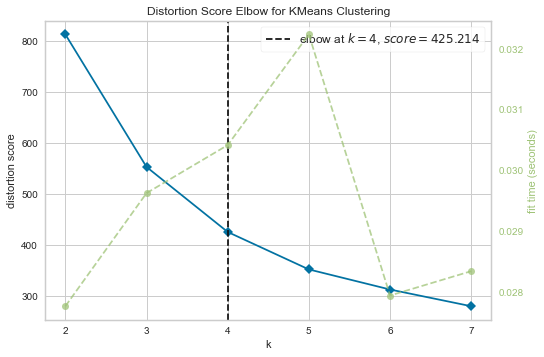

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=7)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### Agglomerative Clustering with k=4

In [42]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

## Clusters Visualization

In [43]:
cmap = plt.cm.viridis

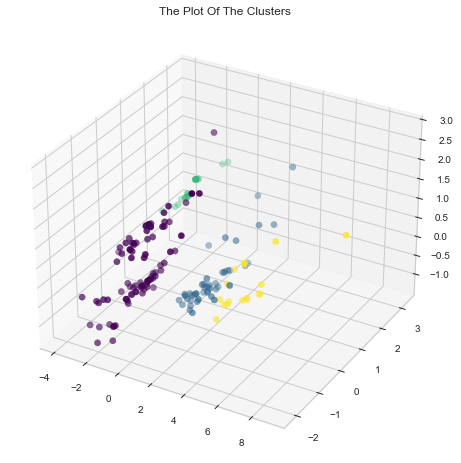

In [44]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

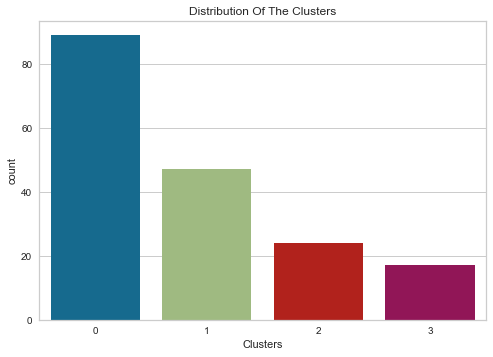

In [45]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

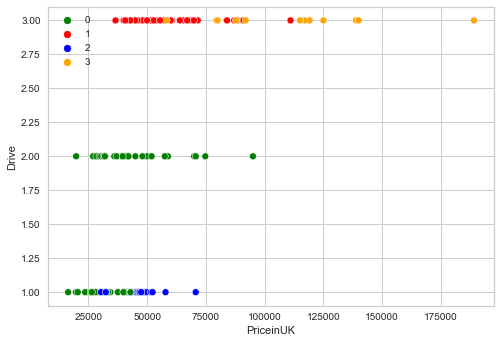

In [46]:
pl = sns.scatterplot(data = df,x=df["PriceinUK"], y=df["Drive"],hue=df["Clusters"], palette= ['green','red','blue','orange'])
plt.legend()
plt.show()

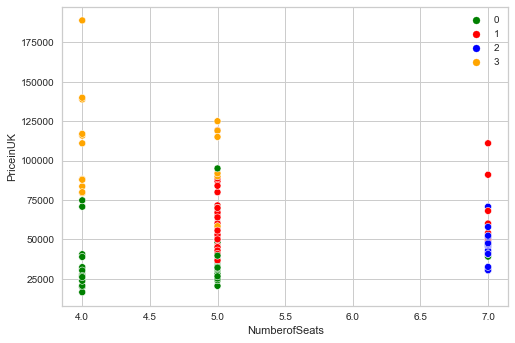

In [47]:
pl = sns.scatterplot(data = df,x=df["NumberofSeats"], y=df["PriceinUK"],hue=df["Clusters"],palette= ['green','red','blue','orange'])
plt.legend()
plt.show()

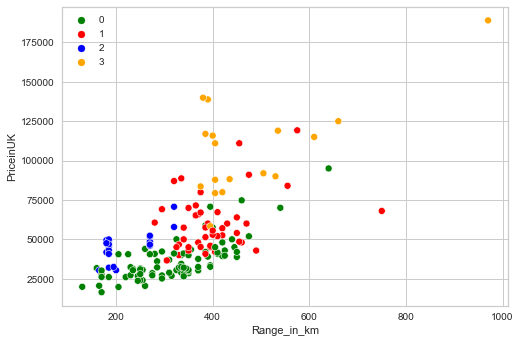

In [48]:
pl = sns.scatterplot(data = df,x=df["Range_in_km"], y=df["PriceinUK"],hue=df["Clusters"],palette= ['green','red','blue','orange'])
plt.legend()
plt.show()

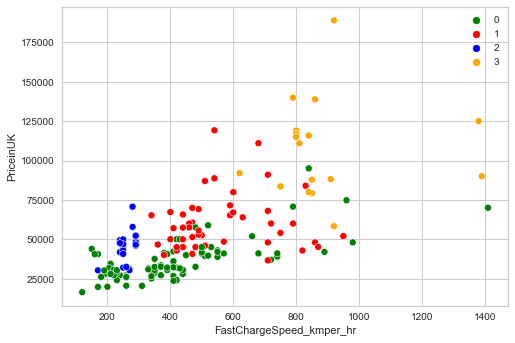

In [49]:
pl = sns.scatterplot(data = df,x=df["FastChargeSpeed_kmper_hr"], y=df["PriceinUK"],hue=df["Clusters"],palette= ['green','red','blue','orange'])
plt.legend()
plt.show()

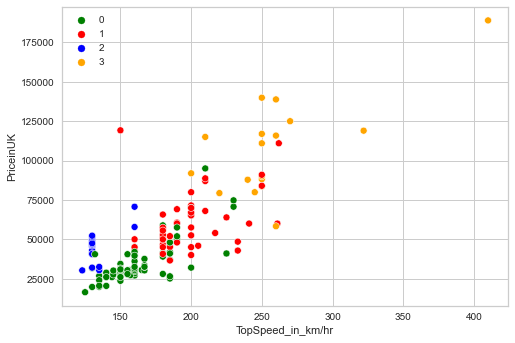

In [50]:
pl = sns.scatterplot(data = df,x=df["TopSpeed_in_km/hr"], y=df["PriceinUK"],hue=df["Clusters"],palette= ['green','red','blue','orange'])
plt.legend()
plt.show()

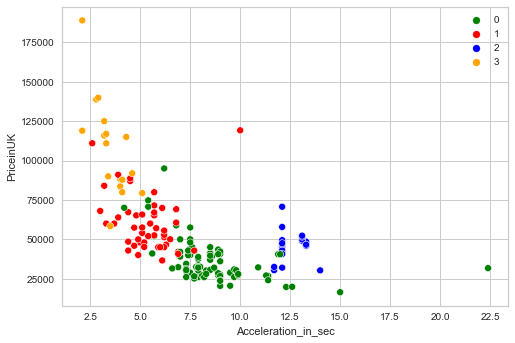

In [51]:
pl = sns.scatterplot(data = df,x=df["Acceleration_in_sec"], y=df["PriceinUK"],hue=df["Clusters"],palette= ['green','red','blue','orange'])
plt.legend()
plt.show()

## DBSCAN

In [52]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(PCA_ds)

DBSCAN()

In [53]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_ds)
distances, indices = nbrs.kneighbors(PCA_ds)

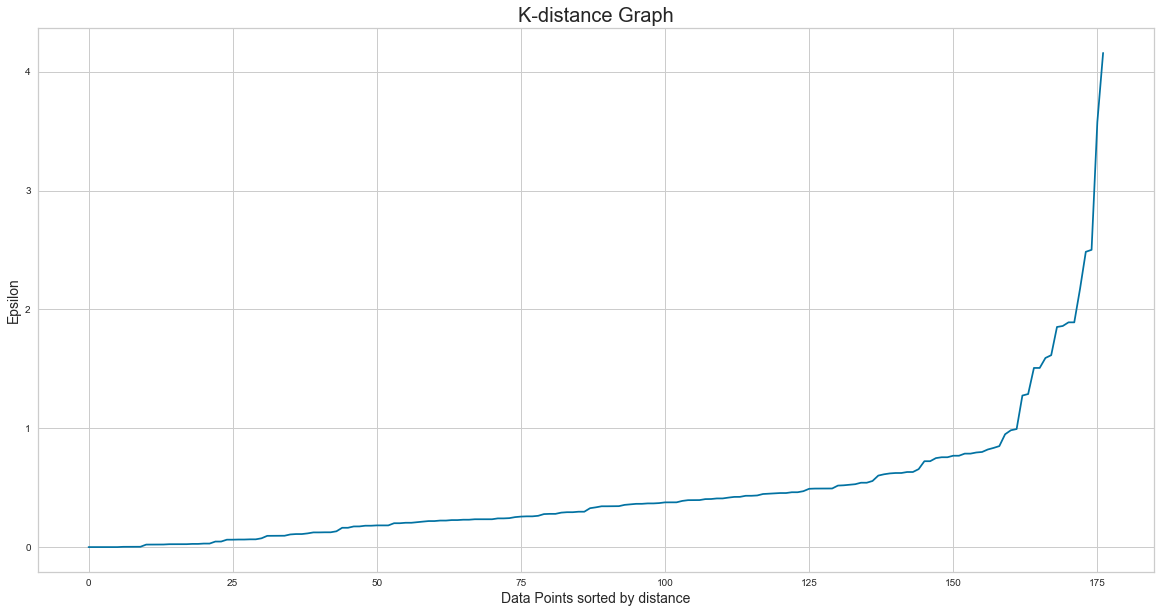

In [54]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [55]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=1.5,min_samples=8)
dbscan_opt.fit(PCA_ds)

DBSCAN(eps=1.5, min_samples=8)

In [56]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    83
 1    38
 2    24
-1    20
 3    12
Name: DBSCAN_opt_labels, dtype: int64

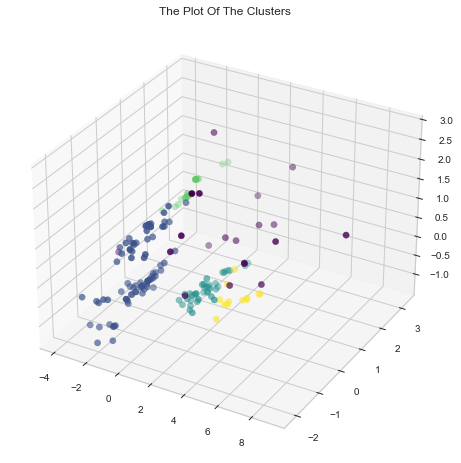

In [57]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df['DBSCAN_opt_labels'], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

In [58]:
print(set(df['DBSCAN_opt_labels']))

{0, 1, 2, 3, -1}


In [59]:
n_clusters=len(dbscan_opt.labels_)
print(metrics.silhouette_score(PCA_ds,dbscan_opt.labels_))

0.4533769079061993
